## Mean / Median imputation - pandas



To download the House Prices dataset, please refer to the lecture **Datasets** in **Section 2** of this course.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [47]:
# We'll use the following variables,
# 3 of which contain NA.


# we have lots of columns in the dataset, but we will use only few of them for this demonstration.

cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

In [48]:
# Let's load the House Prices dataset.


# the house price dataset : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

# Download the files and rename the train.csv as houseprice.csv into the datasets folder.

data = pd.read_csv("../../Datasets/houseprice.csv", usecols=cols_to_use) # only use the specified columns mentioned above in the cols_to_use list

data.head(20) # first 10 rows of the dataset

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000
5,85.0,5,0.0,64,796,796,1362,1993.0,40,143000
6,75.0,8,186.0,317,1686,1694,1694,2004.0,255,307000
7,NaN,7,240.0,216,1107,1107,2090,1973.0,235,200000
8,51.0,7,0.0,952,952,1022,1774,1931.0,90,129900
9,50.0,5,0.0,140,991,1077,1077,1939.0,0,118000


**Remember that the mean or the median that we will use to replace the NA are calculated using the train set.**

In [49]:
# Let's separate into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1), #Keep all columns except SalePrice for Features(X)
    #axis=1 means drop column, axis=0 means drop row
    data["SalePrice"], #TARGET(y)
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 9), (438, 9))

## Use of random_state

In [50]:
# Different results each time
# X_train1, X_test1 = train_test_split(data, test_size=0.3)
# X_train2, X_test2 = train_test_split(data, test_size=0.3)"""
# X_train1 ≠ X_train2 (different random samples)

# Consistent, reproducible results
# X_train1, X_test1 = train_test_split(data, test_size=0.3, random_state=0)
# X_train2, X_test2 = train_test_split(data, test_size=0.3, random_state=0)"""
# X_train1 == X_train2 (identical splits every time)

In [51]:
# Find missing data

X_train.isnull().mean() #as some rows have missing values, we calculate the mean of nulls in each column

LotFrontage    0.184932
OverallQual    0.000000
MasVnrArea     0.004892
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.052838
WoodDeckSF     0.000000
dtype: float64

In [52]:
# Capture the variables to impute in a list.

# find which columns have missing values

vars_to_impute = [var for var in X_train.columns if X_train[var].isnull().sum() > 0]

vars_to_impute

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

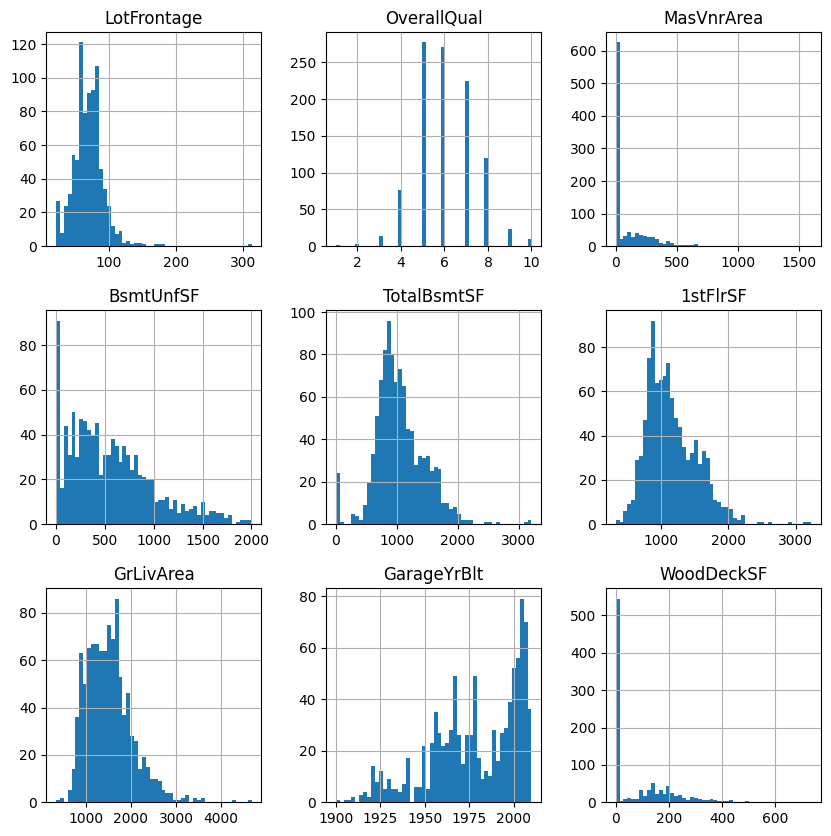

In [53]:
# Let's plot the distributions of the variables. We do it to know if we need to use mean or median imputation.

# If the variable is normally distributed, we can use mean imputation.
# If the variable is skewed, we should use median imputation.

"""Note: A skewed dataset is one where the data points are not evenly distributed and form an asymmetrical, "skewed" curve on a graph, with a tail extending further to one side. This can be either right-skewed (positive skew) with a tail on the right (higher values) or left-skewed (negative skew) with a tail on the left (lower values)."""
# check the image : https://miro.medium.com/1*6LP6ONJmeGMdjIwseCIBGw.jpeg


X_train.hist(bins=50, figsize=(10, 10))
plt.show()

# From the plot, we can see that LotFrontage is skewed, so we will use median imputation for this variable.
# The other two variables (MasVnrArea and GarageYrBlt) look skewed as well, so we will use median imputation for them too.

In [54]:
# Capture the median of the 3 variables in
# a dictionary

#passing the variables which has missing data here, and finding their median values. Then  we will convert them to dictionary.
#imputation_dict = X_train[vars_to_impute].median().to_dict()
imputation_dict = X_train[vars_to_impute].mean().to_dict() # if you wish to use mean imputation instead of median

imputation_dict

{'LotFrontage': 69.66866746698679,
 'MasVnrArea': 103.55358898721731,
 'GarageYrBlt': 1978.0123966942149}

In [55]:
X_train.head(20)

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF
64,NaN,7,573.0,318,1057,1057,2034,1998.0,576
682,NaN,6,0.0,288,1291,1291,1291,1996.0,307
960,50.0,5,0.0,162,858,858,858,NaN,117
1384,60.0,6,0.0,356,560,698,1258,1939.0,0
1100,60.0,2,0.0,0,290,438,438,1930.0,0
416,74.0,6,203.0,463,672,672,1400,1978.0,0
1034,50.0,5,0.0,920,920,954,954,1938.0,0
853,NaN,6,115.0,563,1127,1445,1445,1964.0,180
472,35.0,6,80.0,88,547,1072,1072,2005.0,0
1011,75.0,5,0.0,0,0,1664,1664,NaN,0


Optional: To perform mean imputation instead of median, we just replace the previous code by: `imputation_dict = X_train[vars_to_impute].mean().to_dict()`

# Note: For our variables here, median imputation is more appropriate as they are all skewed.


In [56]:
# Replace missing data with the median value we got earlier.

X_train.fillna(imputation_dict, inplace=True) #applied in training dataset
X_test.fillna(imputation_dict, inplace=True) #applied in testing dataset

In [57]:
# Corroborate replacement

# now if we want to see if we have any missing values left or not, we can see that the sum will be 0 for all columns


X_train.isnull().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
WoodDeckSF     0
dtype: int64

In [58]:
X_train.head(20)

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF
64,69.668667,7,573.0,318,1057,1057,2034,1998.000000,576
682,69.668667,6,0.0,288,1291,1291,1291,1996.000000,307
960,50.000000,5,0.0,162,858,858,858,1978.012397,117
1384,60.000000,6,0.0,356,560,698,1258,1939.000000,0
1100,60.000000,2,0.0,0,290,438,438,1930.000000,0
416,74.000000,6,203.0,463,672,672,1400,1978.000000,0
1034,50.000000,5,0.0,920,920,954,954,1938.000000,0
853,69.668667,6,115.0,563,1127,1445,1445,1964.000000,180
472,35.000000,6,80.0,88,547,1072,1072,2005.000000,0
1011,75.000000,5,0.0,0,0,1664,1664,1978.012397,0


In [59]:
# Corroborate replacement

X_test.isnull().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
WoodDeckSF     0
dtype: int64

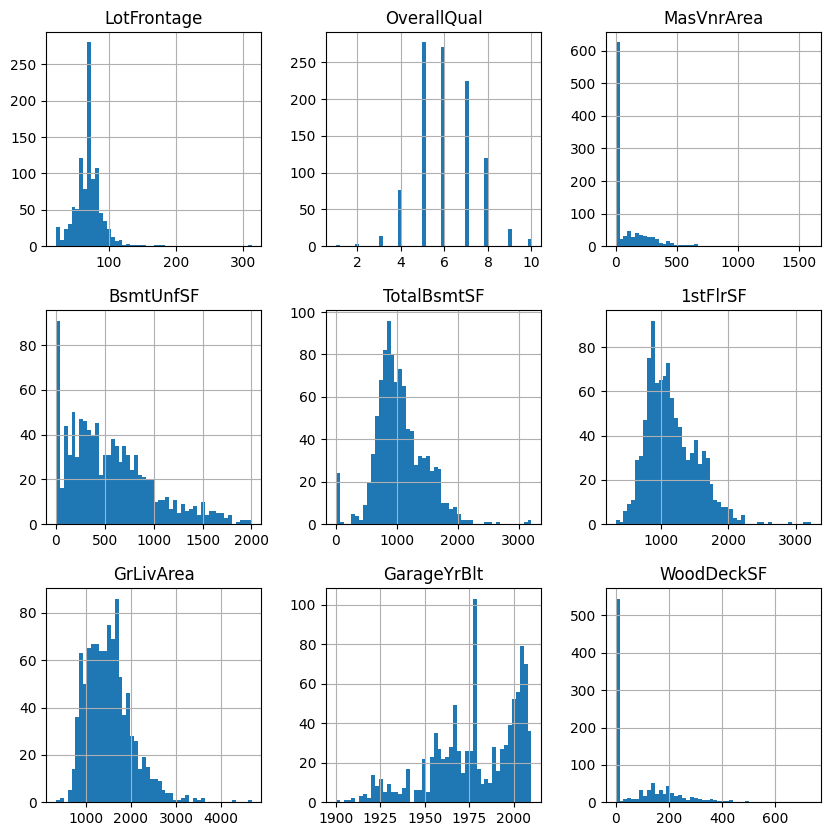

In [60]:

# check the training dataset
X_train.hist(bins=50, figsize=(10, 10))
plt.show()



# for LotFrontage, MasVnrArea, GarageYrBlt columns, the skewness has reduced after imputation   but they are still skewed. Specially MasVnrArea and GarageYrBlt are most skewed.

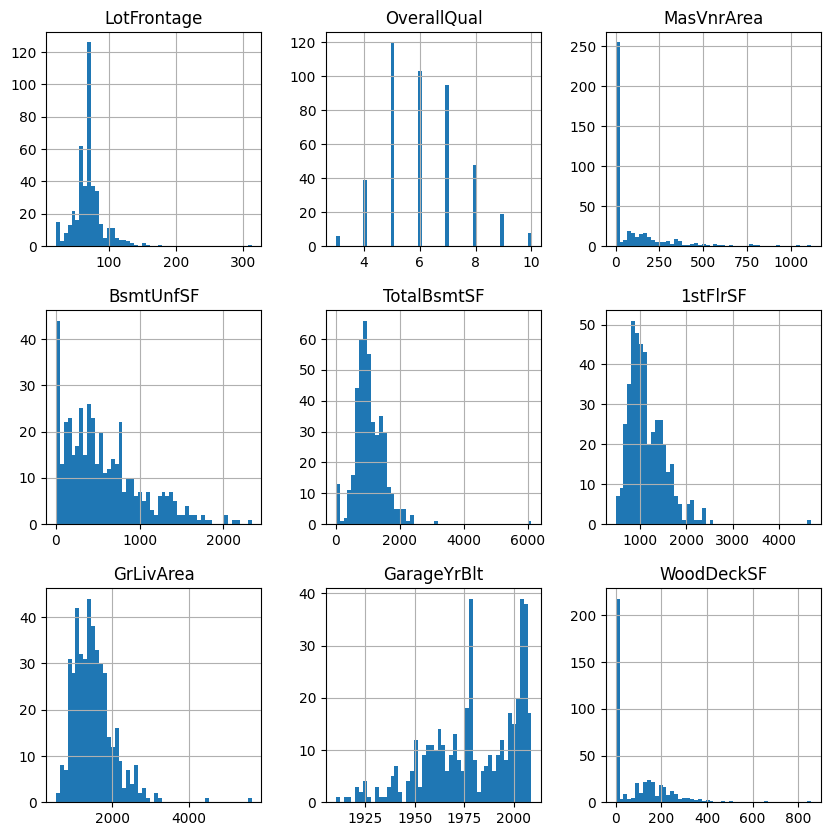

In [61]:
# check the testing dataset
X_test.hist(bins=50, figsize=(10, 10))
plt.show()

# for LotFrontage, MasVnrArea, GarageYrBlt columns, the skewness has reduced after imputation   but they are still skewed. Specially MasVnrArea and GarageYrBlt are most skewed.